### Imports

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Function
import torch.optim as optim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils import Format_Dataset

### Create MLP

In [65]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 2),
            nn.ReLU(),
            nn.Linear(2, 3),
            nn.Softmax(),
        )        
    def forward(self, x):
        y_pred = self.layers(x)
        return y_pred

### Instantiate Model, Criterion, and Optimizer

In [66]:
model = MLP()

# def criterion(out, label):
#     return (label - out) ** 2

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

### Create Dataset

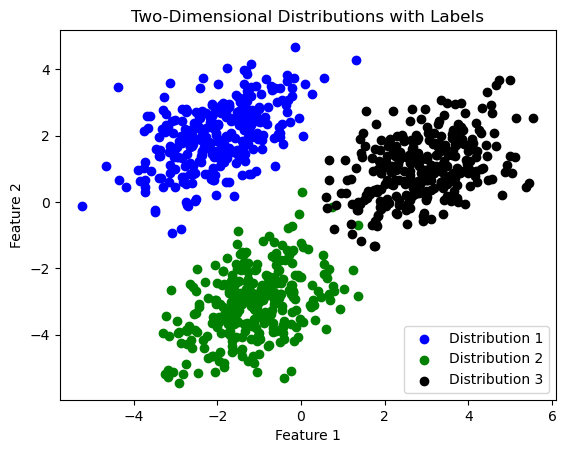

In [67]:
np.random.seed(42)

num_samples = 300

data_c1 = np.random.multivariate_normal(mean=[-2, 2], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
data_c2 = np.random.multivariate_normal(mean=[-1, -3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
data_c3 = np.random.multivariate_normal(mean=[3, 1], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
# data_c3 = np.random.exponential(scale=1, size=(num_samples, 2)) + np.array([2.0, 1.5])

labels_c1 = np.zeros((num_samples, 1))
labels_c2 = np.ones((num_samples, 1))
labels_c3 = 2 * np.ones((num_samples, 1))

class_1 = np.hstack((data_c1, labels_c1))
class_2 = np.hstack((data_c2, labels_c2))
class_3 = np.hstack((data_c3, labels_c3))
all_classes = np.vstack((class_1, class_2, class_3))

dataset_labels = torch.tensor(all_classes[:, 2])
dataset_labels = dataset_labels.long()

one_hot_labels = F.one_hot(dataset_labels, num_classes=3)

# np.random.shuffle(dataset)

dataset_dict = {'samples': all_classes[:, :2], 'labels': one_hot_labels} 
dataset = Format_Dataset(dataset_dict, choice = 'Train')
dataset.samples = dataset.samples.to(torch.float32)
dataset.labels = dataset.labels.to(torch.float32)
dataloader = torch.utils.data.DataLoader( shuffle = False,
                                        dataset = dataset, 
                                        batch_size = 30 ) 

plt.scatter(all_classes[all_classes[:, 2] == 0][:, 0], all_classes[all_classes[:, 2] == 0][:, 1], label='Distribution 1', alpha=1.0, c='blue')
plt.scatter(all_classes[all_classes[:, 2] == 1][:, 0], all_classes[all_classes[:, 2] == 1][:, 1], label='Distribution 2', alpha=1.0, c='green')
plt.scatter(all_classes[all_classes[:, 2] == 2][:, 0], all_classes[all_classes[:, 2] == 2][:, 1], label='Distribution 3', alpha=1.0, c='black')

plt.title('Two-Dimensional Distributions with Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Perform Experiment

Epoch 1/100, Loss: 0.24112976590792337, Accuracy: 0.17333333333333334
Epoch 2/100, Loss: 0.19191193903485934, Accuracy: 0.6533333333333333
Epoch 3/100, Loss: 0.1370934061706066, Accuracy: 0.66
Epoch 4/100, Loss: 0.09680718798190355, Accuracy: 0.6655555555555556
Epoch 5/100, Loss: 0.078849629793937, Accuracy: 0.8488888888888889
Epoch 6/100, Loss: 0.06501089743493746, Accuracy: 0.9788888888888889
Epoch 7/100, Loss: 0.05277355342016866, Accuracy: 0.9911111111111112
Epoch 8/100, Loss: 0.04239384193594257, Accuracy: 0.9922222222222222
Epoch 9/100, Loss: 0.03404242674199243, Accuracy: 0.9922222222222222
Epoch 10/100, Loss: 0.02758218072898065, Accuracy: 0.9944444444444445
Epoch 11/100, Loss: 0.022676088959754755, Accuracy: 0.9933333333333333
Epoch 12/100, Loss: 0.018962544532647976, Accuracy: 0.9933333333333333
Epoch 13/100, Loss: 0.016123845229352205, Accuracy: 0.9955555555555555
Epoch 14/100, Loss: 0.01392813473357819, Accuracy: 0.9955555555555555
Epoch 15/100, Loss: 0.01220263152984747, A

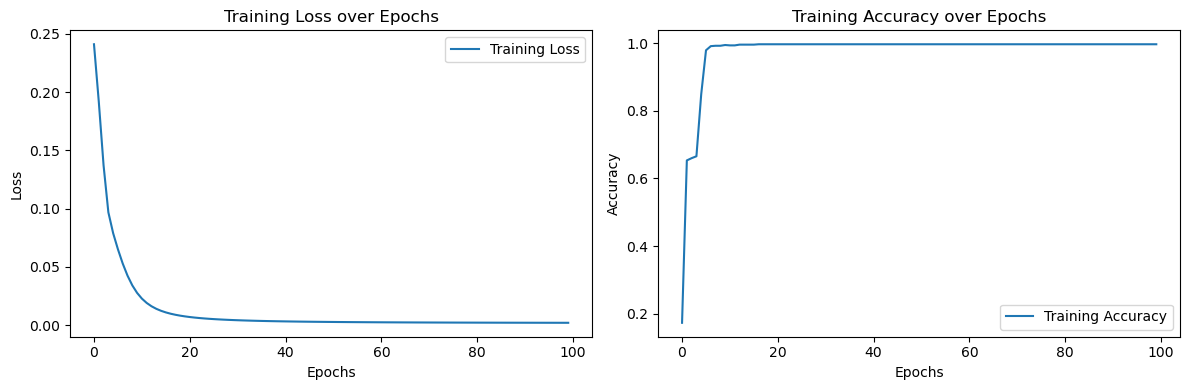

In [68]:
# for epoch in range(100):
#     for data, labels in dataloader:
#         optimizer.zero_grad()
#         outputs = model(data)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

epochs = 100

train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for data, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # _, predicted_labels = torch.max(outputs, 1)
        # correct_predictions += (predicted_labels == labels).sum().item()
        # total_samples += labels.size(0)

        _, predicted_labels = torch.max(outputs, 1)
        ground_truth_labels = torch.argmax(labels, dim=1)
        
        correct_predictions += (predicted_labels == ground_truth_labels).sum().item()
        total_samples += labels.size(0)

    average_loss = total_loss / len(dataloader)
    train_losses.append(average_loss)

    accuracy = correct_predictions / total_samples
    train_accuracies.append(accuracy)

    # Print or log the loss and accuracy for each epoch
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {average_loss}, Accuracy: {accuracy}')

# Plotting
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Get Accuracy and Loss

In [69]:
model.eval()  # Set the model to evaluation mode
total_loss = 0.0
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for data, labels in dataloader:
        outputs = model(data)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        _, predicted_labels = torch.max(outputs, 1)
        ground_truth_labels = torch.argmax(labels, dim=1)
        
        correct_predictions += (predicted_labels == ground_truth_labels).sum().item()
        total_samples += ground_truth_labels.size(0)

average_loss = total_loss / len(dataloader)
accuracy = correct_predictions / total_samples * 100
print(f"Test Loss: {average_loss :.4f}, Test Accuracy: {accuracy :.2f}%")

Test Loss: 0.0018, Test Accuracy: 99.78%


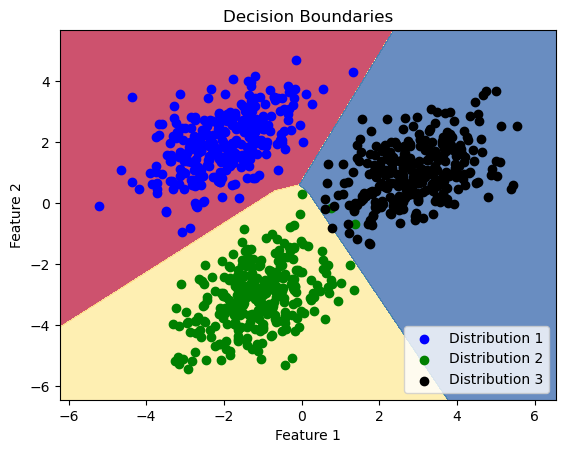

In [70]:
# Create a meshgrid for visualization
x_min, x_max = all_classes[:, 0].min() - 1, all_classes[:, 0].max() + 1
y_min, y_max = all_classes[:, 1].min() - 1, all_classes[:, 1].max() + 1
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

grid_tensor = torch.tensor(np.c_[x_grid.ravel(), y_grid.ravel()], dtype=torch.float32)

model.eval()

with torch.no_grad():
    predictions = model(grid_tensor)
    _, predicted_labels = torch.max(predictions, 1)

decision_regions = predicted_labels.numpy().reshape(x_grid.shape)

plt.contourf(x_grid, y_grid, decision_regions, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(all_classes[all_classes[:, 2] == 0][:, 0], all_classes[all_classes[:, 2] == 0][:, 1], label='Distribution 1', alpha=1.0, c='blue')
plt.scatter(all_classes[all_classes[:, 2] == 1][:, 0], all_classes[all_classes[:, 2] == 1][:, 1], label='Distribution 2', alpha=1.0, c='green')
plt.scatter(all_classes[all_classes[:, 2] == 2][:, 0], all_classes[all_classes[:, 2] == 2][:, 1], label='Distribution 3', alpha=1.0, c='black')

plt.title('Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()